<a href="https://colab.research.google.com/github/Avery1493/DS-Unit-2-Kaggle-Challenge/blob/master/module1-decision-trees/Quinn_221_LS_DS_221_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 2, Module 1*

---

# Decision Trees

## Assignment
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition. Notice that the Rules page also has instructions for the Submission process. The Data page has feature definitions.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Select features. Use a scikit-learn pipeline to encode categoricals, impute missing values, and fit a decision tree classifier.
- [ ] Get your validation accuracy score.
- [ ] Get and plot your feature importances.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.


## Stretch Goals

### Reading

- A Visual Introduction to Machine Learning
  - [Part 1: A Decision Tree](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)
  - [Part 2: Bias and Variance](http://www.r2d3.us/visual-intro-to-machine-learning-part-2/)
- [Decision Trees: Advantages & Disadvantages](https://christophm.github.io/interpretable-ml-book/tree.html#advantages-2)
- [How a Russian mathematician constructed a decision tree — by hand — to solve a medical problem](http://fastml.com/how-a-russian-mathematician-constructed-a-decision-tree-by-hand-to-solve-a-medical-problem/)
- [How decision trees work](https://brohrer.github.io/how_decision_trees_work.html)
- [Let’s Write a Decision Tree Classifier from Scratch](https://www.youtube.com/watch?v=LDRbO9a6XPU) — _Don’t worry about understanding the code, just get introduced to the concepts. This 10 minute video has excellent diagrams and explanations._
- [Random Forests for Complete Beginners: The definitive guide to Random Forests and Decision Trees](https://victorzhou.com/blog/intro-to-random-forests/)


### Doing
- [ ] Add your own stretch goal(s) !
- [ ] Define a function to wrangle train, validate, and test sets in the same way. Clean outliers and engineer features. (For example, [what columns have zeros and shouldn't?](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values) What columns are duplicates, or nearly duplicates? Can you extract the year from date_recorded? Can you engineer new features, such as the number of years from waterpump construction to waterpump inspection?)
- [ ] Try other [scikit-learn imputers](https://scikit-learn.org/stable/modules/impute.html).
- [ ] Make exploratory visualizations and share on Slack.


#### Exploratory visualizations

Visualize the relationships between feature(s) and target. I recommend you do this with your training set, after splitting your data. 

For this problem, you may want to create a new column to represent the target as a number, 0 or 1. For example:

```python
train['functional'] = (train['status_group']=='functional').astype(int)
```



You can try [Seaborn "Categorical estimate" plots](https://seaborn.pydata.org/tutorial/categorical.html) for features with reasonably few unique values. (With too many unique values, the plot is unreadable.)

- Categorical features. (If there are too many unique values, you can replace less frequent values with "OTHER.")
- Numeric features. (If there are too many unique values, you can [bin with pandas cut / qcut functions](https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html?highlight=qcut#discretization-and-quantiling).)

You can try [Seaborn linear model plots](https://seaborn.pydata.org/tutorial/regression.html) with numeric features. For this classification problem, you may want to use the parameter `logistic=True`, but it can be slow.

You do _not_ need to use Seaborn, but it's nice because it includes confidence intervals to visualize uncertainty.

#### High-cardinality categoricals

This code from a previous assignment demonstrates how to replace less frequent values with 'OTHER'

```python
# Reduce cardinality for NEIGHBORHOOD feature ...

# Get a list of the top 10 neighborhoods
top10 = train['NEIGHBORHOOD'].value_counts()[:10].index

# At locations where the neighborhood is NOT in the top 10,
# replace the neighborhood with 'OTHER'
train.loc[~train['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
test.loc[~test['NEIGHBORHOOD'].isin(top10), 'NEIGHBORHOOD'] = 'OTHER'
```


In [1]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Kaggle-Challenge/master/data/'
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

     |████████████████████████████████| 102kB 3.6MB/s 
     |████████████████████████████████| 194kB 4.7MB/s 
     |████████████████████████████████| 614kB 59.4MB/s 
     |████████████████████████████████| 1.5MB 39.2MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 61kB 8.4MB/s 
     |████████████████████████████████| 235kB 40.8MB/s 
     |████████████████████████████████| 307kB 57.0MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 215kB 61.2MB/s 
     |████████████████████████████████| 747kB 60.1MB/s 
     |████████████████████████████████| 61kB 8.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=53935bdcc106c6e805c5356c243530d9e80ae9c9d0432195959333314305ee05
  Stored in directory: /root/.cache/pip/wheels/9b/c9/f1/4a2f30c760e017f3e2f46be999c4597a93d126ef5ea38e276f
  Created wheel for confuse: filename=confuse-1.0.0-cp36

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

train = pd.merge(pd.read_csv(DATA_PATH+'waterpumps/train_features.csv'), 
                 pd.read_csv(DATA_PATH+'waterpumps/train_labels.csv'))
test = pd.read_csv(DATA_PATH+'waterpumps/test_features.csv')
sample_submission = pd.read_csv(DATA_PATH+'waterpumps/sample_submission.csv')

train.shape, test.shape

((59400, 41), (14358, 40))

In [3]:
# Check Pandas Profiling version
import pandas_profiling
pandas_profiling.__version__

'2.5.0'

In [4]:
# Old code for Pandas Profiling version 2.3
# It can be very slow with medium & large datasets.
# These parameters will make it faster.

# profile = train.profile_report(
#     check_correlation_pearson=False,
#     correlations={
#         'pearson': False,
#         'spearman': False,
#         'kendall': False,
#         'phi_k': False,
#         'cramers': False,
#         'recoded': False,
#     },
#     plot={'histogram': {'bayesian_blocks_bins': False}},
# )
#

# New code for Pandas Profiling version 2.4
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

In [9]:
profile = ProfileReport(train, minimal=True)
profile.to_file(output_file="Tanzania_Profile_Report.html")

#Splitting Data

In [10]:
#Splitting Data: train/validate/test 
train, val = train_test_split(train)

train.shape, val.shape, test.shape

((44550, 41), (14850, 41), (14358, 40))

In [13]:
train.sample(5)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
39991,13317,0.0,2011-03-22,Devon Aid Korogwe,419,DWE,38.111404,-4.702612,Shule,0,Pangani,Upareni,Tanga,4,2,Korogwe,Mkomazi,400,True,GeoData Consultants Ltd,VWC,NaN,False,1975,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
23019,65938,0.0,2013-08-03,Oikos E.Afrika,1512,Oikos E .Africa,36.890609,-3.195095,Lendoiya Primary School,0,Internal,Lendoiya,Arusha,2,7,Meru,Ngarenanyuki,350,True,GeoData Consultants Ltd,WUA,NaN,False,2009,gravity,gravity,gravity,wua,user-group,unknown,unknown,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
4139,16301,0.0,2013-02-12,Cocern,1218,TWESA,31.001543,-3.232673,Kagondo,0,Lake Tanganyika,Nyamalebe A,Kigoma,16,1,Kibondo,Kakonko,250,True,GeoData Consultants Ltd,VWC,NaN,False,2013,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
11566,26493,0.0,2011-04-03,NaN,0,NaN,34.312324,-8.676524,Kwa Mwasala,0,Rufiji,Makondogavile,Mbeya,12,7,Mbarali,Ubaruku,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,seasonal,seasonal,river,river/lake,surface,communal standpipe,communal standpipe,non functional
10842,1708,0.0,2011-07-27,NaN,0,NaN,33.543213,-9.164909,Kwa Usweghe,0,Lake Nyasa,Kiwira Kati,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional


# Baseline

In [18]:
train['status_group'].value_counts(normalize=True)

functional                 0.543030
non functional             0.384579
functional needs repair    0.072391
Name: status_group, dtype: float64

# Wrangling Data

In [0]:
import numpy as np

def wrangle(X):
  #make copy
  X = X.copy()
  
  #fixing latitude outlier
  X['latitude'] = X['latitude'].replace(-2e-08, 0)

  columns_with_zeros = ['longitude', 'latitude']
  for col in columns_with_zeros:
    X[col] = X[col].replace(0, np.nan)

  #deleting duplicate columns
  X = X.drop(columns='quantity_group')

  return X

In [33]:
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

train.shape, val.shape, test.shape

((44550, 40), (14850, 40), (14358, 39))

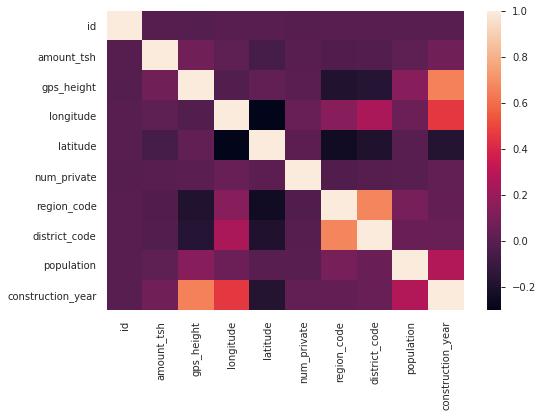

In [34]:
import seaborn as sn
sn.heatmap(train.corr())

# Selecting features. 

In [44]:
#TARGET is status group
target = 'status_group'

#Drop target and id columns 
train_features = train.drop(columns=[target, 'id'])

#Numerical Columns
numeric_features = train_features.select_dtypes(include='number').columns.tolist()

#Catergorical Columns
cardinality = train_features.select_dtypes(exclude='number').nunique()
categorical_features = cardinality[cardinality <= 50].index.tolist()

#FEATURES
features = numeric_features + categorical_features

print(len(features),'Features')
print(features)

30 Features
['amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private', 'region_code', 'district_code', 'population', 'construction_year', 'basin', 'region', 'public_meeting', 'recorded_by', 'scheme_management', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group']


In [0]:
# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]

#Creating pipeline to encode categoricals, impute missing values, and fit a decision tree classifier

In [0]:
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier

In [52]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy= 'mean'),
    DecisionTreeClassifier(random_state=42)
)

#FIT on train data
pipeline.fit(X_train,y_train)


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['basin', 'region', 'public_meeting',
                                     'recorded_by', 'scheme_management',
                                     'permit', 'extraction_type',
                                     'extraction_type_group',
                                     'extraction_type_class', 'management',
                                     'management_group', 'payment',
                                     'payment_type', 'water_quality',
                                     'quality_group', 'quantity', 'source',
                                     'source_type', 'source_class',
                                     'wat...
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                               

# Accuracy score

In [53]:
print('Train Accuracy', pipeline.score(X_train, y_train))
print('Validation Accuracy', pipeline.score(X_val, y_val))

Train Accuracy 0.9953759820426487
Validation Accuracy 0.7582491582491583


In [0]:
y_pred = pipeline.predict(X_test)

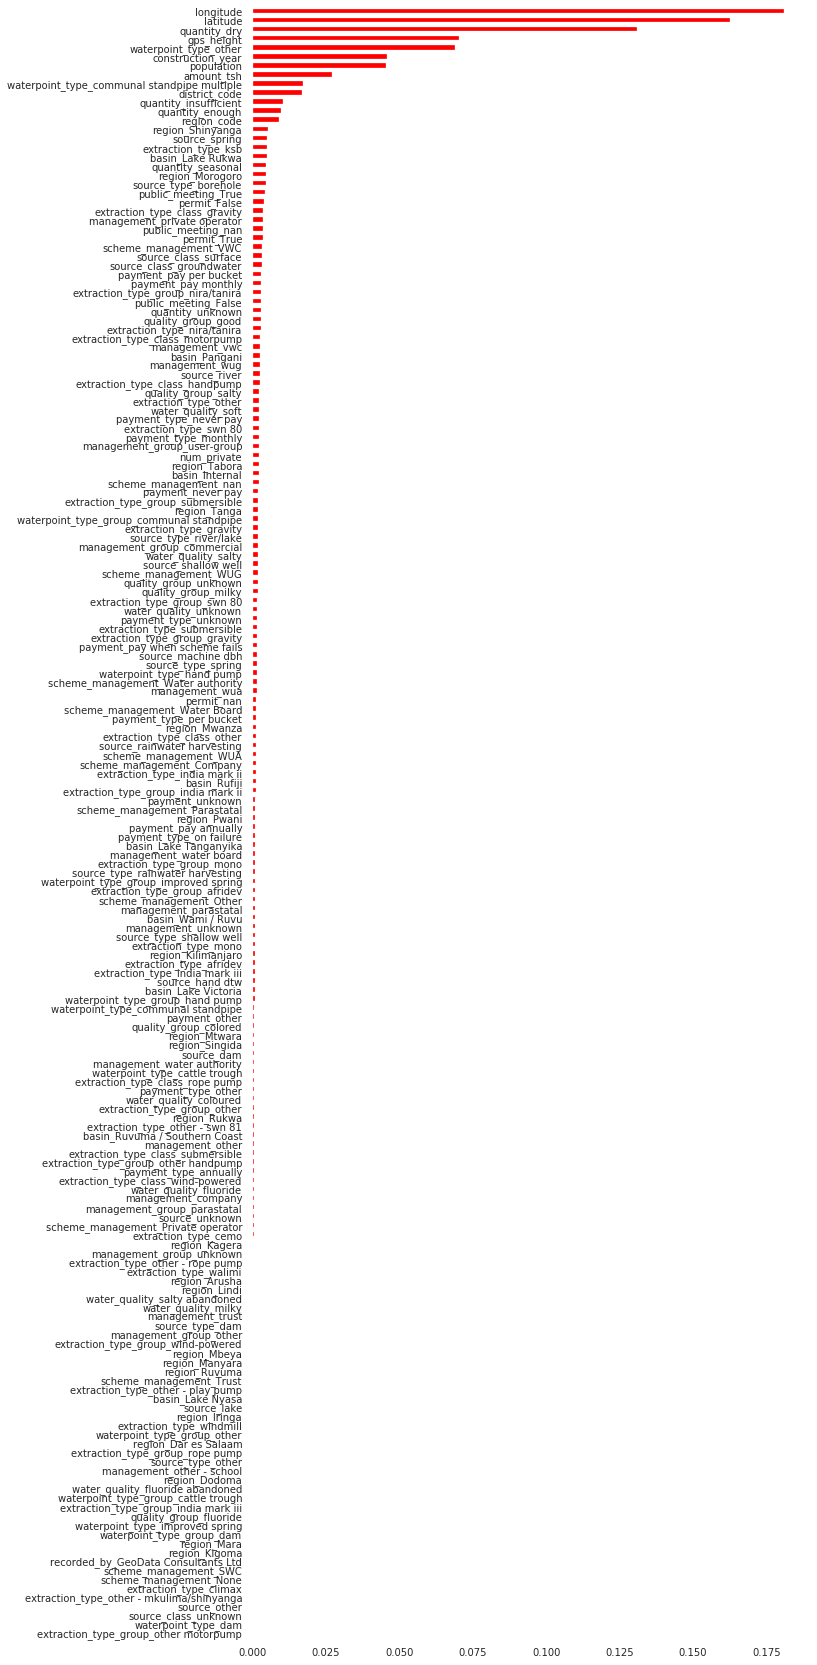

In [70]:
#FEATURE IMPORTANCES
import matplotlib.pyplot as plt

model = pipeline.named_steps['decisiontreeclassifier']
model.feature_importances_
encoder = pipeline.named_steps['onehotencoder']
encoder_columns = pipeline.named_steps['onehotencoder'].transform(X_val).columns
importances = pd.Series(model.feature_importances_, encoder_columns)
plt.figure(figsize=(10,30))
importances.sort_values().plot.barh(color='r');


In [0]:
d = {'id': test['id'], 'status_group': y_pred}
sub = pd.DataFrame(d)
sub.to_csv('Quinn_submission.csv', index=False)

#Decision Tree